# **Fernando Asikin**
# **Project Data Science**

# **Melakukan import library-library yang dibutuhkan**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# **Melakukan load dataset**

**Mencoba membaca data dari file yang telah di unzip**

In [2]:
from zipfile import ZipFile

file_name = "Dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('sudah diekstrak')

sudah diekstrak


# **Melakukan load Dataset**

**Load dataset dari Train.csv**

In [3]:
df_train = pd.read_csv("Train.csv")

In [4]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Membuat ringkasan mengenai statistik data**

In [5]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Dapat dilihat ada beberapa data yang null maka harus dilanjutkan ke step berikutnya yaitu preprocessing

# **Preprocessing Data**

**Mencari fitur yang ada nullnya dan nantinya harus di replace**

In [7]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**ID tidak diperlukan sehingga boleh dihapus**

In [8]:
df_train = df_train.iloc[:,1:]

**Mencoba untuk preview data teratas**

In [9]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Melakukan pengecekan berapa banyak null pada data**

In [10]:
df_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Dari hasil diatas dapat terlihat di Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, dan Credit_History ada value null oleh karena itu perlu dilakukan pengisian/penghapusan data-data tersebut. Disini saya memilih untuk mengisinya saja.

**Pengisisan Data Numerik menggunakan Mean untuk data yang sifatnya numerikal**

In [11]:
meanLA = df_train['LoanAmount'].mean()
meanLAT = df_train['Loan_Amount_Term'].mean()
modeCH = df_train['Credit_History'].mode()[0]

df_train['LoanAmount'] = df_train['LoanAmount'].fillna(meanLA) 
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(meanLAT) 
#untuk CreditHistory karena artinya hanya 2 yang pernah dan belum maka lebih baik menggunakan modus
df_train['Credit_History'] = df_train['Credit_History'].fillna(modeCH) 

**Pengisian Data Kategorikal menggunakan modus untuk data yang sifatnya kategorikal**

In [12]:
modG = df_train['Gender'].mode()[0]
modM = df_train['Married'].mode()[0]
modD = df_train['Dependents'].mode()[0]
modSE = df_train['Self_Employed'].mode()[0]

df_train['Gender'] = df_train['Gender'].fillna(modG) 
df_train['Married'] = df_train['Married'].fillna(modM) 
df_train['Dependents'] = df_train['Dependents'].fillna(modD) 
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(modSE) 

**Mengecek kembali apakah datanya sudah berubah**

In [13]:
df_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# **Exploratory Data Analsis**

**Visualisasi Atribut Kategorikal**

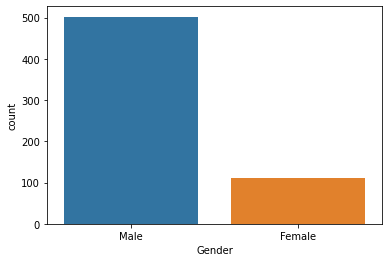

In [14]:
sns.countplot(x = df_train['Gender'])
plt.show()

Lebih banyak yang male

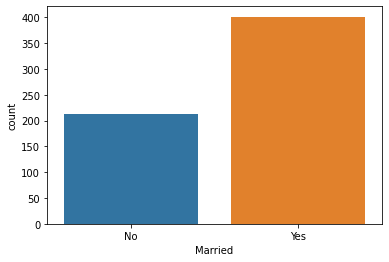

In [15]:
sns.countplot(x = df_train['Married'])
plt.show()

Banyak yang sudah married

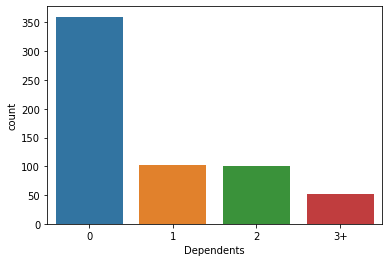

In [16]:
sns.countplot(x = df_train['Dependents'])
plt.show()

Lebih banyak yang tidak mempunyai dependents

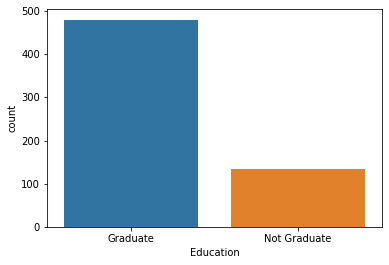

In [17]:
sns.countplot(x = df_train['Education'])
plt.show()

Lebih banyak yang graduate

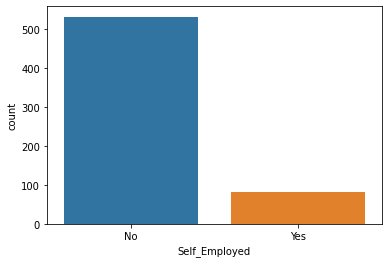

In [18]:
sns.countplot(x = df_train['Self_Employed'])
plt.show()

Lebih banyak yang bekerja dibandingkan dengan bisnis sendiri

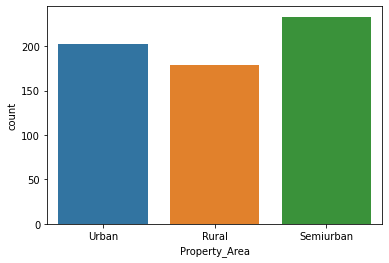

In [19]:
sns.countplot(x = df_train['Property_Area'])
plt.show()

Hampir sama rata namun lebih banyak yang di semiurban

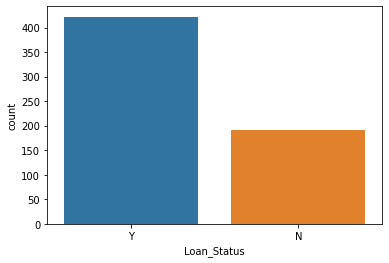

In [20]:
sns.countplot(x = df_train['Loan_Status'])
plt.show()

Kebanyakan permintaan loannya itu diapprove

**Mencoba untuk visualisasi kategorikal digabung dengan status loannya**

In [21]:
df_train['Loan_Status'].replace('N',0,inplace=True)
df_train['Loan_Status'].replace('Y',1,inplace=True)

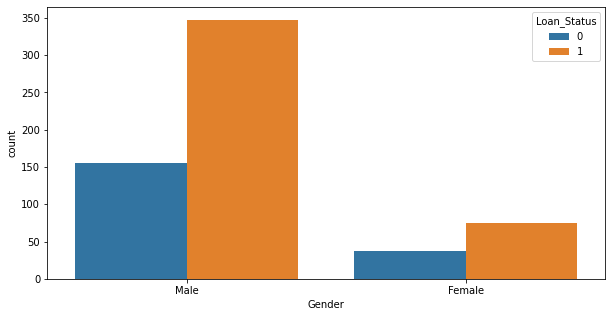

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender', hue='Loan_Status', data=df_train);

Dari sana dapat terlihat bahwa yang lebih cenderung mendapatkan loan adalah male

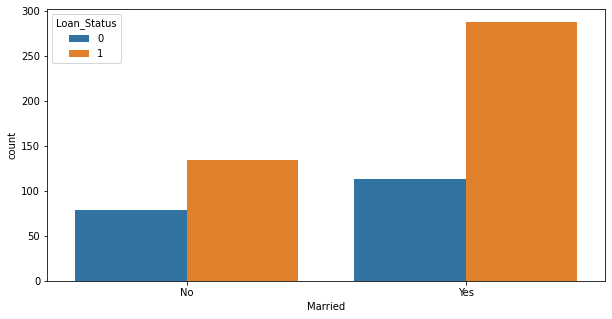

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x='Married', hue='Loan_Status', data=df_train);

Dari sana dapat terlihat bahwa orang yang sudah menikah memiliki kecenderungan mendapatkan loan 

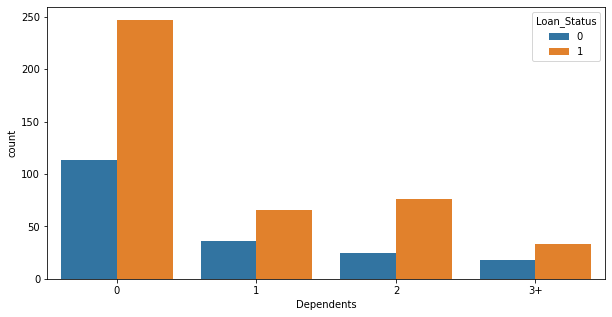

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=df_train);

Dari sana dapat tidak konsisten karena yang dependentnya 1 dan 2, 2 lebih tinggi dari 1 padahal pada 0 dia itu lebih tinggi lagi jadi tidak dapat diambil kesimpulan

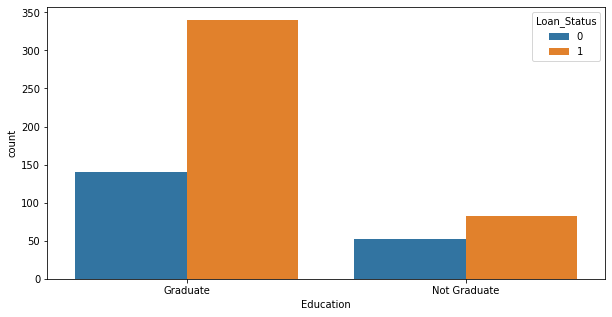

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x='Education', hue='Loan_Status', data=df_train);

Dari sana dapat terlihat bahwa orang yang sudah graduate memiliki kecenderungan mendapatkan loan 

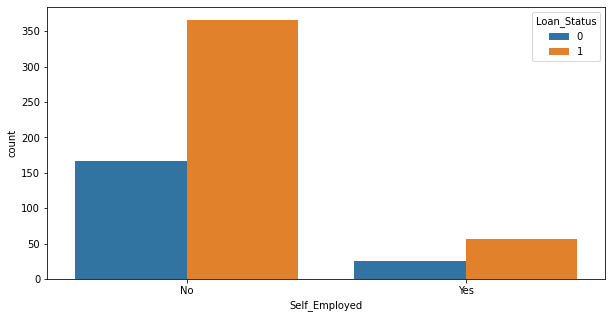

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df_train)
plt.show()

Dari sana dapat terlihat bahwa orang yang sudah punya bukan bekerja sendiri memiliki kecenderungan mendapatkan loan 

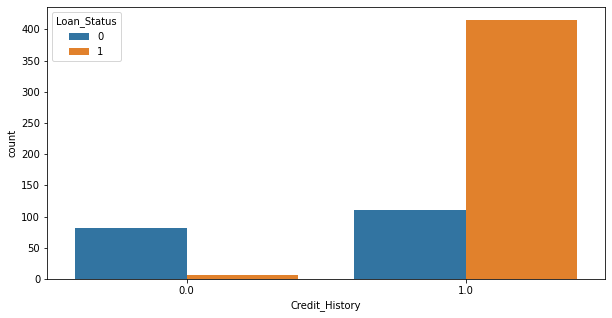

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df_train)
plt.show()

Dari sana dapat terlihat bahwa orang yang sudah punya sudah memiliki history pinjam kecenderungan mendapatkan loan 

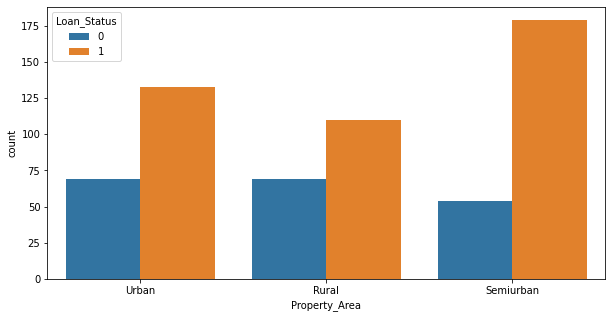

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df_train)
plt.show()

Dari sana dapat terlihat bahwa orang yang tinggal di semi urban lebih tinggi kecenderungan mendapatkan loan 

**Visualisasi Atribut Numerikal**

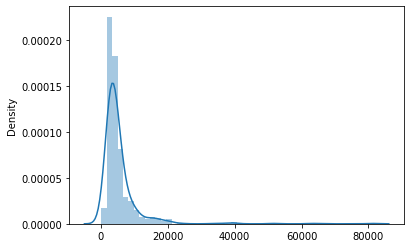

In [29]:
sns.distplot(x = df_train['ApplicantIncome'])
plt.show()

Distribusinya untuk ApplicantIncome left skewed, diperlukan normalisasi

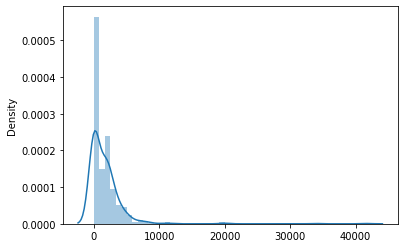

In [30]:
sns.distplot(x = df_train['CoapplicantIncome'])
plt.show()

Distribusinya untuk CoapplicantIncome left skewed, diperlukan normalisasi

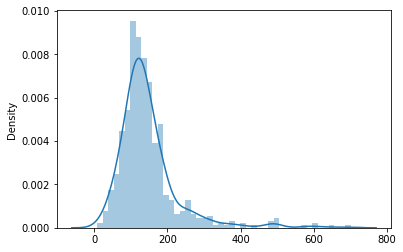

In [31]:
sns.distplot(x = df_train['LoanAmount'])
plt.show()

Distribusinya untuk LoanAmount left skewed, diperlukan normalisasi

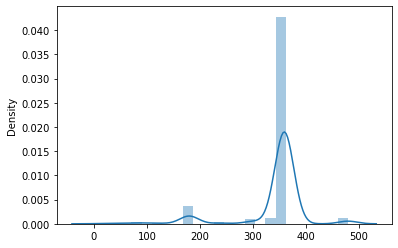

In [32]:
sns.distplot(x = df_train['Loan_Amount_Term'])
plt.show()

Distribusinya untuk Loan Amount Term juga masih skewed, diperlukan normalisasi

In [33]:
df_train['TotalIncome'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']

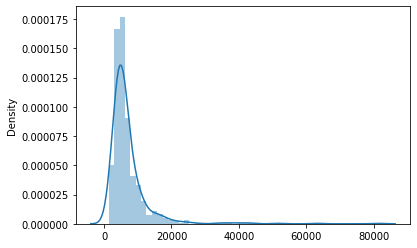

In [34]:
sns.distplot(x = df_train['TotalIncome'])
plt.show()

Distribusinya walaupun sudah dijumlahkan incomenya masih dia diperlukan normalisasi

# **Normalisasi data numerik dengan menggunakan log transformation**

In [35]:
df_train['ApplicantIncome'] = np.log(df_train['ApplicantIncome']+1)

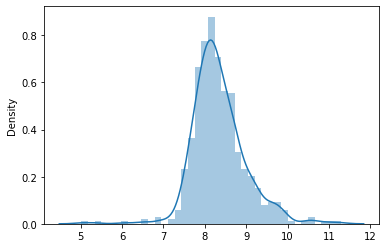

In [36]:
sns.distplot(x = df_train['ApplicantIncome'])
plt.show()

In [37]:
df_train['CoapplicantIncome'] = np.log(df_train['CoapplicantIncome']+1)

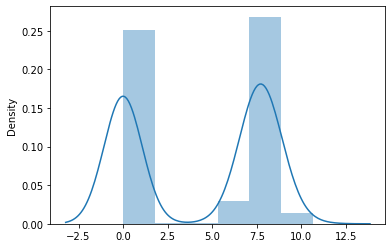

In [38]:
sns.distplot(x = df_train['CoapplicantIncome'])
plt.show()

In [39]:
df_train['LoanAmount'] = np.log(df_train['LoanAmount']+1)

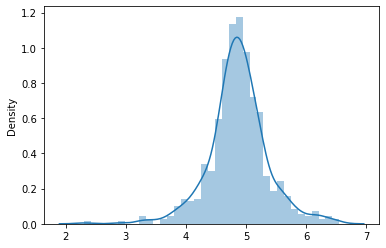

In [40]:
sns.distplot(x = df_train['LoanAmount'])
plt.show()

In [41]:
df_train['Loan_Amount_Term'] = np.log(df_train['Loan_Amount_Term']+1)

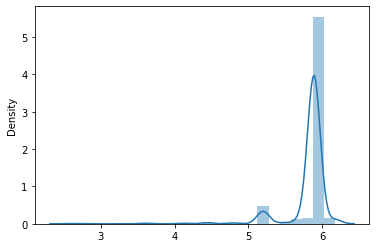

In [42]:
sns.distplot(x = df_train['Loan_Amount_Term'])
plt.show()

In [43]:
df_train['TotalIncome'] = np.log(df_train['TotalIncome']+1)

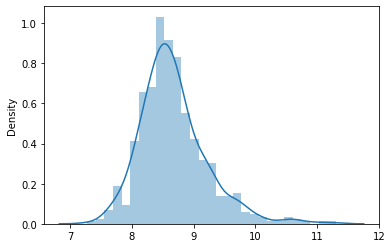

In [44]:
sns.distplot(x = df_train['TotalIncome'])
plt.show()

**Label Encoding**

In [45]:
category_column = []
numerical_column = []

for i in df_train.columns:
    if df_train[i].dtype not in ['int64', 'float64']:
        category_column.append(i)
    else:
      numerical_column.append(i)

In [46]:
for j in category_column:
    df_train[j] = LabelEncoder().fit_transform(df_train[j])

**Correlation Matrix**

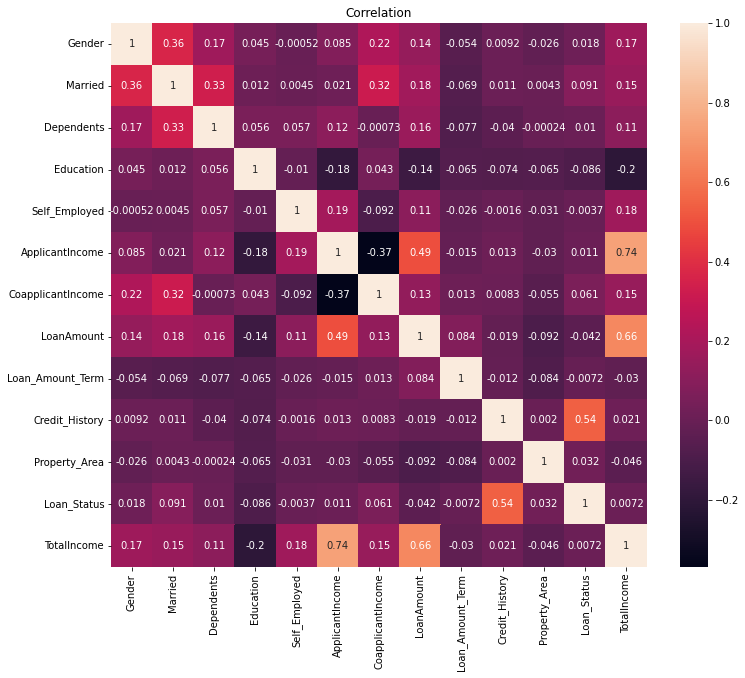

In [47]:
cm = df_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cm, 
         xticklabels=cm.columns, 
         yticklabels=cm.columns, annot = True).set_title('Correlation')
plt.show()

Dari Correlation Matrix ditemukan bahwa yang berasal dari fitur numerik hanya ada ApplicantIncome, CoaaplicantIncome, dan TotalIncome yang positif Sedangkan untuk yang fitur kategorikal itu ada Gender, Married, Dependents, Credit History, dan Property_Area

# **Feature Selection**

Feature Selection menggunakan yang 7 terbaik dari Correlation Matrix
1. Credit_History
2. Married
3. CoappliantIncome
4. Property_Area
5. Gender
6. ApplicantIncome
7. Dependents

In [48]:
df_train2 = df_train.copy()

In [49]:
df_train2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,8.674197,0.000000,4.993232,5.888878,1.0,2,1,8.674197
1,1,1,1,0,0,8.430327,7.319202,4.859812,5.888878,1.0,0,0,8.714732
2,1,1,0,0,1,8.006701,0.000000,4.204693,5.888878,1.0,2,1,8.006701
3,1,1,0,1,0,7.857094,7.765993,4.795791,5.888878,1.0,2,1,8.505525
4,1,0,0,0,0,8.699681,0.000000,4.955827,5.888878,1.0,2,1,8.699681


In [50]:
df_train2 = df_train2[['Credit_History', 'Married', 'CoapplicantIncome', 'Property_Area', 'Gender', 'ApplicantIncome','Dependents','Loan_Status']]

In [51]:
df_train2.head()

,Credit_History,Married,CoapplicantIncome,Property_Area,Gender,ApplicantIncome,Dependents,Loan_Status
0,1.0,0,0.000000,2,1,8.674197,0,1
1,1.0,1,7.319202,0,1,8.430327,1,0
2,1.0,1,0.000000,2,1,8.006701,0,1
3,1.0,1,7.765993,2,1,7.857094,0,1
4,1.0,0,0.000000,2,1,8.699681,0,1


In [52]:
x = df_train2.iloc[:, :-1]
y = df_train2.iloc[:,-1]

In [53]:
x

,Credit_History,Married,CoapplicantIncome,Property_Area,Gender,ApplicantIncome,Dependents
0,1.0,0,0.000000,2,1,8.674197,0
1,1.0,1,7.319202,0,1,8.430327,1
2,1.0,1,0.000000,2,1,8.006701,0
3,1.0,1,7.765993,2,1,7.857094,0
4,1.0,0,0.000000,2,1,8.699681,0
...,...,...,...,...,...,...,...
609,1.0,0,0.000000,0,0,7.972811,0
610,1.0,1,0.000000,0,1,8.320448,3
611,1.0,1,5.484797,2,1,8.996280,1
612,1.0,1,0.000000,2,1,8.933796,2


In [54]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [56]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 7)
(123, 7)
(491,)
(123,)


# **Train Model**

In [57]:
model = LogisticRegression()

In [58]:
model = model.fit(x_train, y_train)

# **Testing Model**

In [59]:
y_pred = model.predict(x_test)

In [60]:
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)));
print('Precision Score: {}'.format(precision_score(y_test, y_pred)));
print('Recall Score: {}'.format(recall_score(y_test, y_pred)));
print('F1 Score: {}'.format(f1_score(y_test, y_pred)));

Accuracy Score: 0.8048780487804879
Precision Score: 0.7830188679245284
Recall Score: 0.9880952380952381
F1 Score: 0.8736842105263158


Akurasi yang didapatkan dari model saya cukup baik karena sudah bisa melakukan prediksi sebesar 80 persen

# **Confusion Matrix**

In [61]:
conf_matrix_original = confusion_matrix(y_test, y_pred)

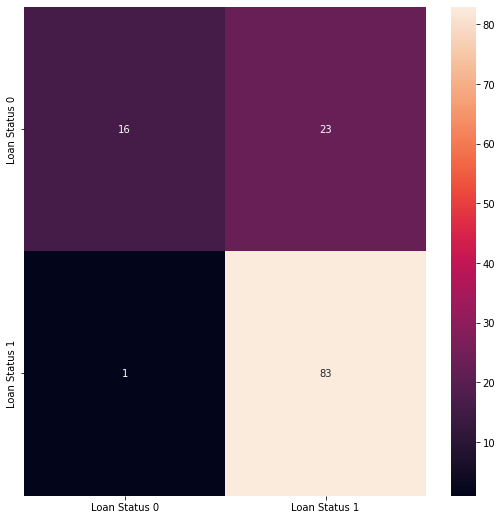

In [62]:
plt.figure(figsize=(9, 9))
preview = sns.heatmap(conf_matrix_original, annot=True, fmt='g')
preview.set(xticklabels=['Loan Status 0','Loan Status 1'], yticklabels=['Loan Status 0','Loan Status 1'])
plt.show()